In [1]:
import pandas as pd 
import numpy as np 
from pandas.testing import assert_frame_equal
from pandas_datareader import data as web

# Import the plotting library
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Define dataframe variable
spy = pd.DataFrame()

# Define stock that will be analysed
asset = 'SPY'
 
# Import data into dataframe
spy = web.DataReader(asset, data_source='yahoo', start='01-01-1998')

spy.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1998-01-02,97.65625,96.53125,97.31250,97.56250,2360900.0,64.577606
1998-01-05,98.43750,96.78125,97.84375,97.78125,4191800.0,64.722412
1998-01-06,97.28125,96.18750,97.25000,96.21875,3154900.0,63.688168
1998-01-07,96.71875,95.21875,96.09375,96.46875,4424200.0,63.853657
1998-01-08,96.31250,95.37500,96.31250,95.62500,3831000.0,63.295177


In [3]:
spy['50d'] = spy.Close.rolling(window=50, min_periods=1).mean()

spy['200d'] = spy.Close.rolling(window=200, min_periods=1).mean()

spy.tail()

,High,Low,Open,Close,Volume,Adj Close,50d,200d
Date,,,,,,,,
2020-10-19,349.329987,341.040009,348.649994,342.010010,68425600.0,342.010010,339.496802,311.896501
2020-10-20,346.880005,342.640015,343.459991,343.380005,60051900.0,343.380005,339.653002,311.995201
2020-10-21,345.670013,342.399994,343.329987,342.730011,63575000.0,342.730011,339.851603,312.095201
2020-10-22,345.239990,340.649994,342.959991,344.609985,55399300.0,344.609985,339.995002,312.196001
2020-10-23,345.989990,343.130005,345.929993,345.779999,49088100.0,345.779999,340.174003,312.291651


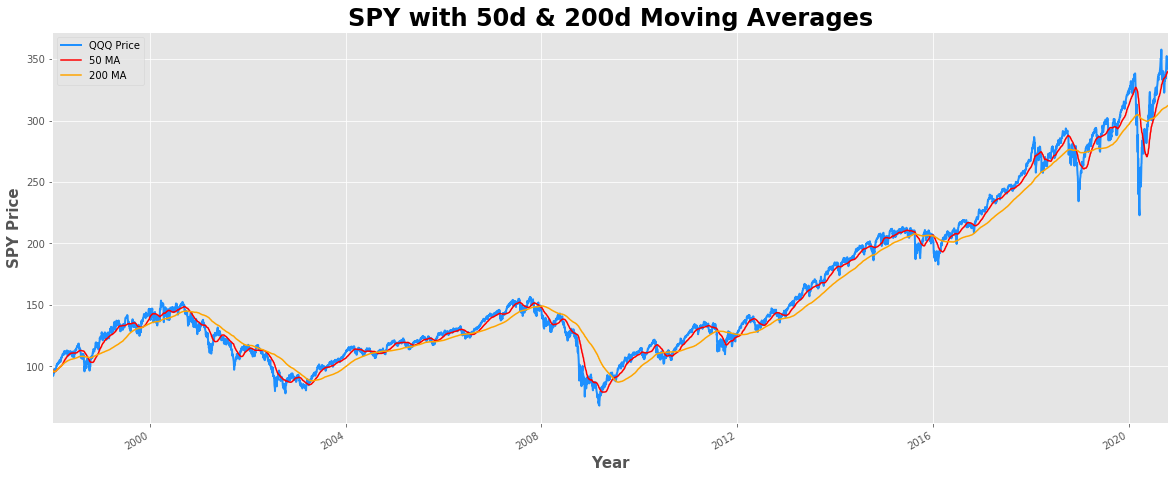

In [4]:
f, ax = plt.subplots(figsize=(20,8))

spy['Close'].plot(color = 'dodgerblue', label = 'QQQ Price', lw=2)
spy['50d'].plot(ax = ax, label = '50 MA', color = 'red')
spy['200d'].plot(ax = ax, label = '200 MA', color = 'orange')

ax.set_ylabel('SPY Price', fontsize=15, fontweight = 'bold')
ax.set_xlabel('Year', fontsize=15, fontweight = 'bold')
ax.set_title('SPY with 50d & 200d Moving Averages', fontsize=24, fontweight='bold')
ax.legend()

In [14]:
# Plotting the Crossover Signals

# Code to generate trading signals: the rule says the following:

- Buy signal (go long): the 50d trend is for the first time SD points above the 200d trend.

- Wait (park in cash): the 42d trend is within a range of +/– SD points around the 252d trend.

- Sell signal (go short): the 50d trend is for the first time SD points below the 200d trend.

In [5]:
spy['50-200'] = spy['50d'] - spy['200d']
print(spy['50-200'].tail())
spy_no_zeros = spy[spy!=0].dropna() # Dropping the zeros in the data
spy_no_zeros

Date
2020-10-19    27.600302
2020-10-20    27.657802
2020-10-21    27.756402
2020-10-22    27.799002
2020-10-23    27.882352
Name: 50-200, dtype: float64


,High,Low,Open,Close,Volume,Adj Close,50d,200d,50-200
Date,,,,,,,,,
1998-03-17,108.562500,107.656250,108.312500,108.562500,4581900.0,71.858620,101.046562,100.978248,0.068315
1998-03-18,108.968750,108.031250,108.250000,108.968750,1944100.0,72.127548,101.270313,101.131911,0.138401
1998-03-19,109.375000,108.656250,108.968750,109.250000,2554800.0,72.313683,101.530937,101.285083,0.245855
1998-03-20,110.187500,108.875000,109.562500,109.875000,3123300.0,72.936356,101.799063,101.444155,0.354907
1998-03-23,110.312500,109.406250,109.718750,109.625000,4453100.0,72.770416,102.079063,101.592898,0.486165
1998-03-24,110.812500,109.937500,110.062500,110.562500,3333600.0,73.392715,102.444063,101.753069,0.690993
1998-03-25,111.531250,109.187500,111.406250,110.156250,4597600.0,73.123032,102.767188,101.900493,0.866694
1998-03-26,110.750000,109.625000,109.875000,110.093750,3333500.0,73.081566,103.062813,102.041756,1.021056
1998-03-27,110.781250,109.000000,110.750000,109.625000,2611300.0,72.770416,103.340312,102.170286,1.170026


In [6]:
# To make it more formal, we again generate a new column for what we call a regime.

spy['50-200'] = spy['50d'] - spy['200d']
Threshold = 0
spy['Regime'] = np.where(spy['50-200'] > Threshold,1,0)
spy['Regime'] = np.where(spy['50-200'] < -Threshold,-1,spy['Regime'])
spy['Regime'].value_counts()

 1    4039
-1    1652
 0      50
Name: Regime, dtype: int64

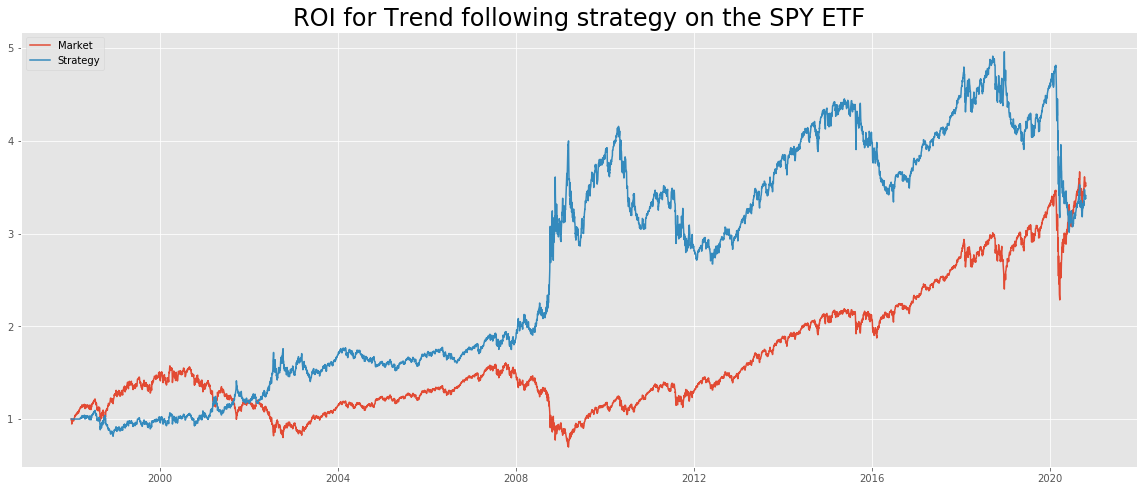

In [24]:
spy['Market'] = np.log(spy['Close'] / spy['Close'].shift(1))
spy['Strategy'] = spy['Regime'].shift(1) * spy['Market']

plt.figure(figsize=(20,8))
plt.plot(spy[['Market', 'Strategy']].cumsum().apply(np.exp))
plt.legend(spy[['Market', 'Strategy']].columns, loc=2)
plt.title('ROI for Trend following strategy on the SPY ETF', fontsize = 24)
plt.show()

# Conclusion for Trading Strategy
We can now test the investment strategy based on the signals. Assuming you have a brokerage account, you will be able to long and short the SPY ETF. This strategy will not account for fees considering they are at 0 at most brokerages at the moment. 

Based on the Trading Strategy, the investor either is long or short the SPY ETF, or you will be all in cash i.e. being Flat. 

This simple strategy will be working straightly through market returns. The investor makes the market return when he is long (1), makes the negative market returns when he is short (–1), and makes no returns (0) when you are flat. 

The strategy has historically outperformed the Market, but due to some unconventional market movement and fiscal support from the FED it seems to have not been doing as well lately. Will be interesting to see if it can once again outperform, or if this type of strategy is no longer working due to the unconventional market environement. 